In [1]:
import pandas as pd

train = pd.read_csv("labeledTrainData.tsv", header=0, \
                    delimiter="\t", quoting=3)
test = pd.read_csv("testData.tsv", header=0, \
                    delimiter="\t", quoting=3)
import os
import numpy as np
from bs4 import BeautifulSoup             
import re
import nltk
from nltk.corpus import stopwords # Import the stop word list

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import roc_auc_score as AUC

In [2]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( words ))   

In [3]:
num_reviews = train["review"].size
# Initialize an empty list to hold the clean reviews
clean_train_reviews = []
clean_test_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range( 0, num_reviews ):
# If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0 ):
        print ("Review %d of %d\n" % ( i+1, num_reviews ))                                                             
    clean_train_reviews.append( review_to_words( train["review"][i] ))
    clean_test_reviews.append( review_to_words( test["review"][i] ))

Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



In [4]:
vectorizer = TfidfVectorizer( max_features = 50000, ngram_range = ( 1, 4 ), 
	sublinear_tf = True )
train_data_features = vectorizer.fit_transform( clean_train_reviews )
test_data_features = vectorizer.transform( clean_test_reviews )

In [5]:
def train_and_eval_auc( model, train_x, train_y, test_x):
	model.fit( train_x, train_y )
	p = model.predict( test_x )
	return p

In [6]:
lr = LR()
result = train_and_eval_auc( lr, train_data_features, train["sentiment"], \
	test_data_features)
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )
output.to_csv( "Bag_of_Words_model.csv", index=False, quoting=3 )

In [5]:
print(x.shape)

(12,)


In [6]:
X = tf.reshape(x,(3,4))

In [7]:
X

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])>

In [8]:
Y = tf.constant([[2,1,4,3],[1,2,3,4],[4,3,2,1]])

In [9]:
Y

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[2, 1, 4, 3],
       [1, 2, 3, 4],
       [4, 3, 2, 1]])>

In [10]:
x = tf.reshape(tf.Variable(range(4), dtype=tf.float32),(4,1))

In [11]:
x

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [2.],
       [3.]], dtype=float32)>

In [12]:
with tf.GradientTape() as t:
    t.watch(x)
    y = 2 * tf.matmul(tf.transpose(x), x)
    
dy_dx = t.gradient(y, x)
dy_dx

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[ 0.],
       [ 4.],
       [ 8.],
       [12.]], dtype=float32)>

In [1]:
import tensorflow as tf


In [2]:
from time import time

In [5]:
a = tf.ones((1000,))

In [7]:
b = tf.ones((1000,))

In [9]:
start = time()

In [10]:
start

1602405412.306094

In [11]:
c = tf.Variable(tf.zeros(1000))

In [13]:
import tensorflow as tf
print(tf.__version__)
from matplotlib import pyplot as plt
import random

2.3.1


In [14]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = tf.random.normal((num_examples, num_inputs),stddev = 1)
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += tf.random.normal(labels.shape,stddev=0.01)

In [15]:
print(features[0], labels[0])


tf.Tensor([-0.77539754  0.7845324 ], shape=(2,), dtype=float32) tf.Tensor(-0.027733078, shape=(), dtype=float32)


In [16]:
help tf.random.normal

SyntaxError: invalid syntax (<ipython-input-16-bf2ac22f2bb7>, line 1)

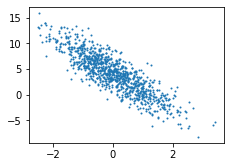

In [17]:
def set_figsize(figsize=(3.5, 2.5)):
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1], labels, 1)

In [1]:
c = tf.zeros(1000);

NameError: name 'tf' is not defined

In [2]:
import tensorflow as tf

In [7]:
c = tf.zeros(1000);

In [5]:
d = tf.zeros((1000,))

In [9]:
e = tf.Variable(tf.zeros(1000))

In [3]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x
dy_dx = g.gradient(y, x) # Will compute to 6.0
